In [12]:
# Importing the required modules
import cv2
import easygui 
import numpy as np 
import imageio 
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [2]:
!pip install easygui

In [13]:
#we will build the main window of our application, where the buttons, labels, and images will reside


In [14]:
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

In [15]:
def cartoonify(ImagePath): imagedemo.jpg

In [18]:
ImagePath= "imagedemo.jpg"
originalmage = cv2.imread(ImagePath)
originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
if originalmage is None:
    print("Can not find any image. Choose appropriate file")
    sys.exit()
    
ReSized1 = cv2.resize(originalmage, (960, 540))

In [19]:
#Transforming an image to grayscale

In [20]:
grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (960, 540))

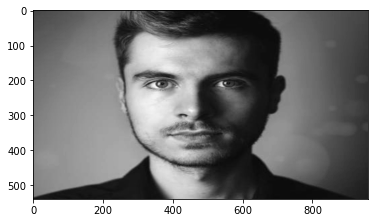

In [21]:
plt.imshow(ReSized2, cmap='gray')

In [22]:
#Smoothening a grayscale image

In [23]:
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
ReSized3 = cv2.resize(smoothGrayScale, (960, 540))

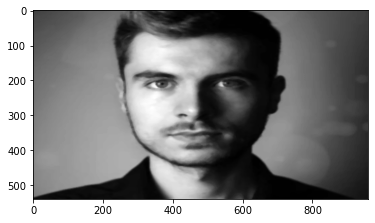

In [24]:
plt.imshow(ReSized3, cmap='gray')

In [25]:
#Retrieving the edges of the image for cartoon effect using thresholding techniques

In [26]:
getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
  cv2.ADAPTIVE_THRESH_MEAN_C, 
  cv2.THRESH_BINARY, 9, 9)
ReSized4 = cv2.resize(getEdge, (960, 540))

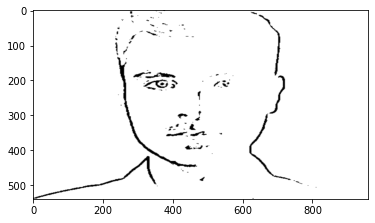

In [27]:
plt.imshow(ReSized4, cmap='gray')

In [28]:
#Preparing a Mask Image
#applying bilateral filter to remove noise 

In [29]:
colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
ReSized5 = cv2.resize(colorImage, (960, 540))

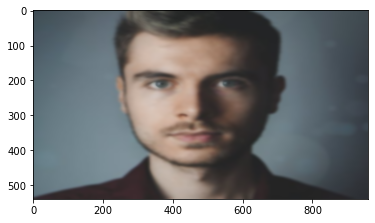

In [30]:
plt.imshow(ReSized5, cmap='gray')

In [31]:
#now the Cartoon Effect
#masking edged image with our "BEAUTIFY" image
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
ReSized6 = cv2.resize(cartoonImage, (960, 540))

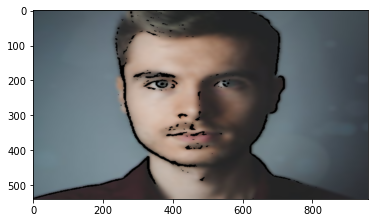

In [32]:
plt.imshow(ReSized6, cmap='gray')

In [33]:
#Plotting all the transitions together


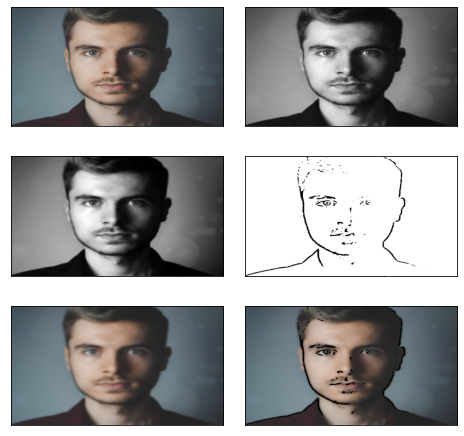

In [35]:
images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
plt.show()

In [42]:
#save button
def save(ReSized6, ImagePath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I = "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

In [43]:
#main window
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))


In [44]:
#Cartoonify button
upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

In [45]:
#Save button
save1=Button(top,text="Save cartoon image",command=lambda: save(ImagePath, ReSized6),padx=30,pady=5)
save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
save1.pack(side=TOP,pady=50)

In [46]:
top.mainloop()